In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision
import pickle
import numpy as np
%matplotlib inline

use_gpu = True if torch.cuda.is_available() else False

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)

#model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub','PGAN', model_name='celebAHQ-512',pretrained=True, useGPU=use_gpu)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/archive/hub.zip" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/DCGAN_fashionGen-1d67302.pth" to /root/.cache/torch/checkpoints/DCGAN_fashionGen-1d67302.pth
100%|██████████| 39.7M/39.7M [00:04<00:00, 9.44MB/s]

Average network found !


In [2]:
model

In [3]:
# num_images = 64
# noise, _ = model.buildNoiseData(num_images)

In [4]:
def save_noise(num_images):
    noise, _ = model.buildNoiseData(num_images)
    with open('test.pickle', mode='wb') as f:
        pickle.dump(noise, f)
        
def generate_images(model,noise):
    return model.test(noise)

In [5]:
def draw_two_images(images):
    img_list = []
    for img in images:
        trans_img = img.permute(1,2,0).cpu().numpy()
        trans_img = np.clip(np.rint((trans_img + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)
        img_list.append(trans_img)
        if len(img_list) == 2:
            break
    plt.subplot(1, 2, 1)
    plt.imshow(img_list[0])
    plt.subplot(1, 2, 2)
    plt.imshow(img_list[1])

In [6]:
# with open('test.pickle', mode='rb') as f:
#     test_noise = pickle.load(f)
# test_noise.shape

In [7]:
def load_noise():
    with open('test.pickle', mode='rb') as f:
        test_noise = pickle.load(f)
    return test_noise

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


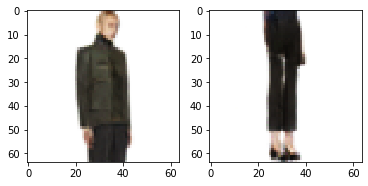

In [8]:
save_noise(64)
noise = load_noise()

with torch.no_grad():
    generated_images = model.test(noise)

draw_two_images(generated_images)
# print(noise.shape)
# print(generated_images.shape)



In [9]:
def get2noise(noise):
    noise_list = []
    for i in noise:
        noise_list.append(i)
        if len(noise_list) == 2:
            break
    return noise_list

n2 = get2noise(noise)

2
torch.Size([120])


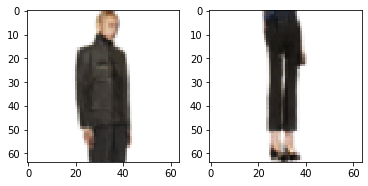

In [10]:
print(len(n2))
print(n2[0].shape)

draw_two_images(generate_images(model,torch.stack(n2)))

In [11]:
def calc_interpolate(noise_list):
    num = 64
    step_size = 1/num
    step = 0
    inp_noise_list = []
    for i in range(0, num):
        r = (1 - step) * noise_list[0] + step * noise_list[1]
        inp_noise_list.append(r)
        step += step_size
    #print(len(inp_noise_list))
    return inp_noise_list

noise_tensor = torch.stack(calc_interpolate(n2))
print(noise_tensor.shape)

torch.Size([64, 120])


In [12]:
images = generate_images(model,noise_tensor)
print(images.shape)

torch.Size([64, 3, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


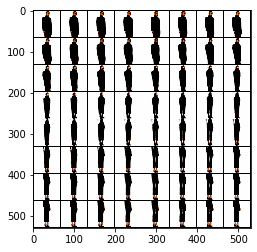

In [13]:
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0).cpu().numpy())

In [15]:
from ipywidgets import interact

def f(x, a, b):
    return a * x + b

interact(f, x=(-10,10, 1), a=(-10,10, 1), b=(-10,10, 1))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='a'…

<function __main__.f(x, a, b)>